Projekt MNwS - Aleksander Folfas 411052

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors

Zadanie 11

Za pomocą odpowiednich symulacji zbadać moc testów: Jarque-Bera, Shapiro-Wilka i Lillieforsa w
przypadku, gdy dane pochodzą z rozkładu 𝑡-Studenta. Uzyskane wyniki należy przedstawić na
odpowiednich wykresach ilustrujących moce testów z uwzględnieniem:
- liczby danych,
- liczby stopni swobody generowanego rozkładu t-Studenta.

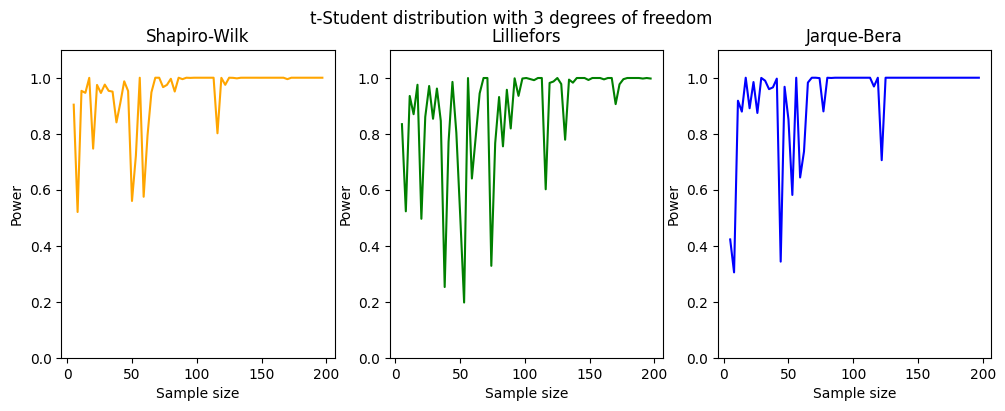

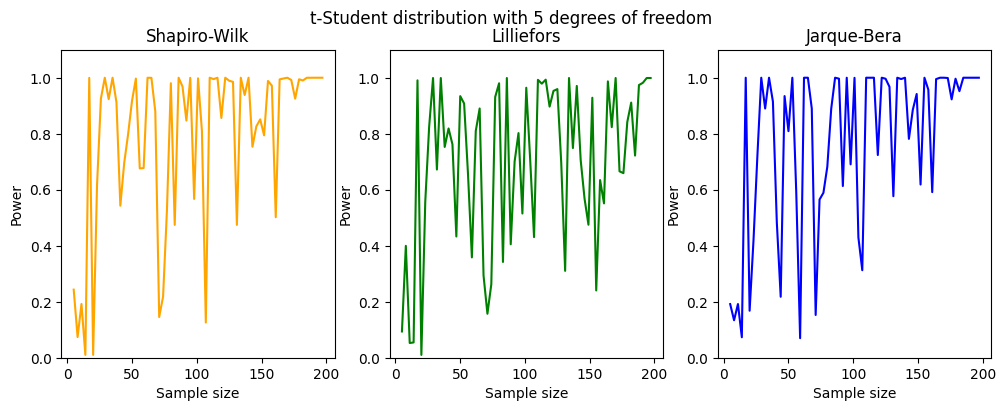

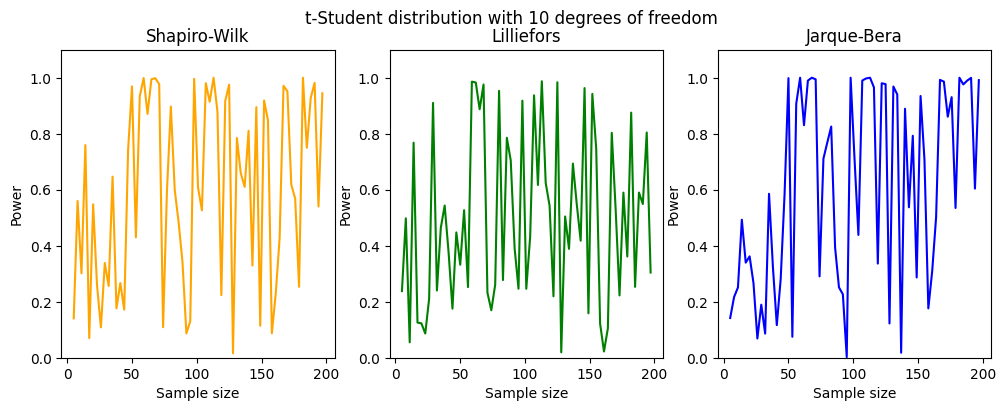

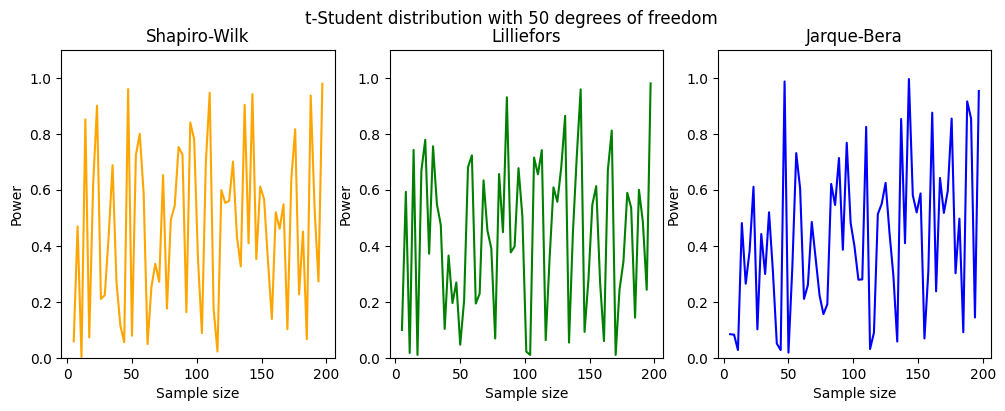

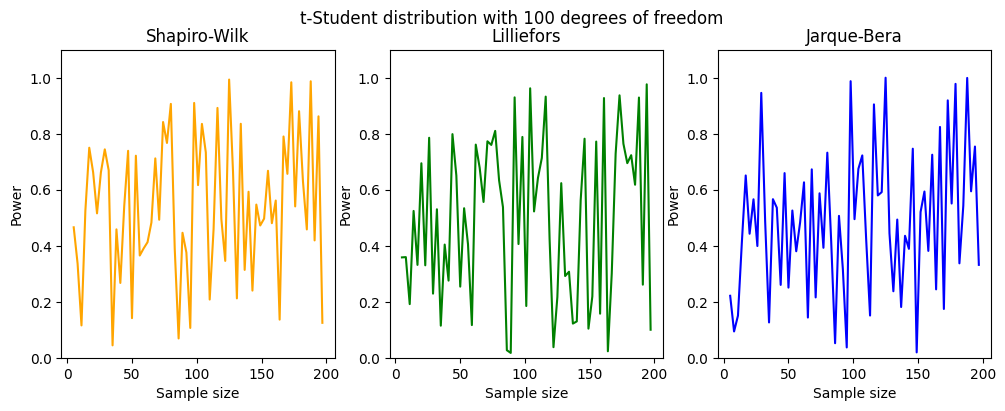

In [16]:
# Symulacja rozkładu t-Studenta
def simulate_powers(n_samples, df_values):
    powers = []
    n_tests = 3

    for df in df_values:
        df_powers = np.zeros((n_tests, len(n_samples)))

        for i, n in enumerate(n_samples):
            data = stats.t.rvs(df, size=n)
            data = (data - np.mean(data)) / np.std(data, ddof=1)

            # Test Shapiro-Wilka
            _, sw_pval = stats.shapiro(data)
            sw_power = 1 - sw_pval
            df_powers[0, i] = sw_power

            # Test Lillieforsa
            _, lf_pval = lilliefors(data,pvalmethod='table')
            lf_power = 1 - lf_pval
            df_powers[1, i] = lf_power

            # Test Jarque-Bera
            _, jb_pval = stats.jarque_bera(data)
            jb_power = 1 - jb_pval
            df_powers[2, i] = jb_power

        powers.append(df_powers)

    return powers

np.random.seed(seed=411052)
n_samples = np.arange(5, 200, 3)
df_values = np.array([3, 5, 10, 50, 100])

powers = simulate_powers(n_samples, df_values)

test_names = ['Shapiro-Wilk', 'Lilliefors', 'Jarque-Bera']
colors = [ 'orange','green','blue']
# Wykresy
for i, df in enumerate(df_values):
    fig, axes = plt.subplots(ncols=len(test_names), figsize=(12, 4))
    fig.suptitle(f't-Student distribution with {df} degrees of freedom\n')
    
    for j, test_name in enumerate(test_names):
        ax = axes[j]
        ax.set_title(test_name)
        ax.set_xlabel('Sample size')
        ax.set_ylabel('Power')
        ax.set_ylim(0, 1.1)
        ax.plot(n_samples, powers[i][j], colors[j])        
    plt.show()